In [1]:
%pylab inline
from octopus import shapes, orbit_cm
from pygadgetreader import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [9]:
# Loading simulation data from N-body simulations
dm_pos_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
dm_vel_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'vel', 'dm')
dm_ids_i = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pid', 'dm')

dm_pos_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pos', 'dm')
dm_vel_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'vel', 'dm')
dm_ids_f = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pid', 'dm')

# Loading data of isolated MW:
mw_pos_i = readsnap('../data/MW_models/pm/model2/MWN2vir_000.hdf5', 'pos', 'dm')
mw_pos_f = readsnap('../data/MW_models/pm/model2/MWN2vir_014.hdf5', 'pos', 'dm')


Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Positions


In [4]:
def mw_particles(xyz, vxyz, ids, N_halo):
    id_cut = np.sort(ids)[N_halo]
    index_mw = np.where(ids<id_cut)[0]
    return xyz[index_mw], vxyz[index_mw]

In [5]:
mw_pos_i, mw_vel_i = mw_particles(dm_pos_i, dm_vel_i, dm_ids_i, 1000000)
mw_pos_f, mw_vel_f = mw_particles(dm_pos_f, dm_vel_f, dm_ids_f, 1000000)

In [6]:
xcm_i, ycm_i, zcm_i, vx_cmi, vy_cmi, vz_cmi = orbit_cm.CM(mw_pos_i, mw_vel_i)
xcm_f, ycm_f, zcm_f, vx_cmf, vy_cmf, vz_cmf = orbit_cm.CM(mw_pos_f, mw_vel_f)

In [7]:
print xcm_i, ycm_i, zcm_i
print xcm_f, ycm_f, zcm_f

0.0326767973748 -0.0160168181304 -0.025037442445
3.14213492468 33.1085245965 -10.5106429199


In [8]:
N_r = 200
#q_shell_i = np.zeros(N_r)
#q_tshell_i = np.zeros(N_r)
#q_tshell_f = np.zeros(N_r)

#s_tshell_i = np.zeros(N_r)
#s_tshell_f = np.zeros(N_r)

#q_tvol_i = np.zeros(N_r)
#q_tvol_f = np.zeros(N_r)

#s_tvol_i = np.zeros(N_r)
#s_tvol_f = np.zeros(N_r)

#s_shell_i = np.zeros(N_r)
#q_vol_i = np.zeros(N_r)
#s_vol_i = np.zeros(N_r)

#q_shell_f = np.zeros(N_r)
#s_shell_f = np.zeros(N_r)
#q_vol_f = np.zeros(N_r)
#s_vol_f = np.zeros(N_r)

r = np.linspace(3, 400, N_r)


In [37]:
#for i in range(len(r)):
#    q_shell_i[i], s_shell_i[i] = shapes.iterate_shell(mw_pos_i[:,0]-xcm_i, mw_pos_i[:,1]-ycm_i, mw_pos_i[:,2]-zcm_i, r[i], 1.0, 1E-2)
#    q_shell_f[i], s_shell_f[i] = shapes.iterate_shell(mw_pos_f[:,0]-xcm_f, mw_pos_f[:,1]-ycm_f, mw_pos_f[:,2]-zcm_f, r[i], 1.0, 1E-2)

In [39]:
#for i in range(len(r)):
#    #q_tshell_i[i], s_tshell_i[i] = shapes.iterate_shell(dm_pos_i[:,0]-xcm_i, dm_pos_i[:,1]-ycm_i, dm_pos_i[:,2]-zcm_i, r[i], 1.0, 1E-1)
#    q_tshell_f[i], s_tshell_f[i] = shapes.iterate_shell(dm_pos_f[:,0]-xcm_f, dm_pos_f[:,1]-ycm_f, dm_pos_f[:,2]-zcm_f, r[i], 1.0, 1E-1)

In [40]:
#for i in range(len(r)):
#    q_tvol_i[i], s_tvol_i[i] = shapes.iterate_volume(dm_pos_i[:,0]-xcm_i, dm_pos_i[:,1]-ycm_i, dm_pos_i[:,2]-zcm_i, r[i], 1E-1)
#   #q_tvol_f[i], s_tvol_f[i] = shapes.iterate_volume(dm_pos_f[:,0]-xcm_f, dm_pos_f[:,1]-ycm_f, dm_pos_f[:,2]-zcm_f, r[i], 1E-1)

In [9]:
for i in range(len(r)):
    q_vol_i[i], s_vol_i[i] = shapes.iterate_volume(mw_pos_i[:,0]-xcm_i, mw_pos_i[:,1]-ycm_i, mw_pos_i[:,2]-zcm_i, r[i], 1E-1)
    q_vol_f[i], s_vol_f[i] = shapes.iterate_volume(mw_pos_f[:,0]-xcm_f, mw_pos_f[:,1]-ycm_f, mw_pos_f[:,2]-zcm_f, r[i], 1E-1)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


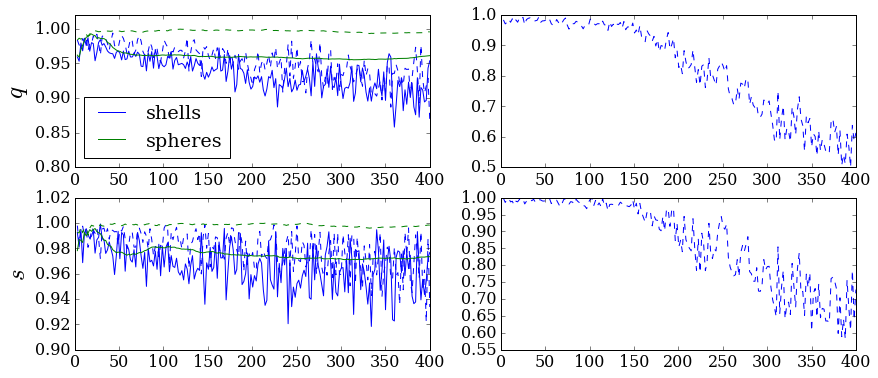

In [59]:
figure=(figsize(14,6))
subplot(2, 2, 1)
plot(r, q_shell_i, ls='--', c='b')
plot(r, q_shell_f, ls='-', c='b', label='shells')
plot(r, q_vol_i, ls='--', c='g')
plot(r, q_vol_f, ls='-', c='g', label='spheres')
ylabel('$q$', fontsize=25)
ylim([0.8, 1.02])

legend(loc='best')
subplot(2, 2, 2)
plot(r, q_tshell_i, ls='--',label='shell', c='b')
#plot(r, q_tshell_f, ls='-', c='b', label='shells')
#plot(r, q_vol_i, ls='--', c='g')
#plot(r, q_vol_f, ls='-', c='g', label='spheres')
#ylabel('$q$', fontsize=25)

subplot(2, 2, 3)
plot(r, s_shell_i, ls='--', c='b')
plot(r, s_shell_f, ls='-', c='b')
plot(r, s_vol_i, ls='--', c='g')
plot(r, s_vol_f, ls='-', c='g')
ylabel('$s$', fontsize=25)
#plt.ylim(0.8, 1.2)
ylim([0.9, 1.02])


subplot(2, 2, 4)
plot(r, s_tshell_i, ls='--',label='shell', c='b')
#plot(r, s_tshell_f, ls='-', c='b', label='shells')
#plot(r, q_vol_i, ls='--', c='g')
#plot(r, q_vol_f, ls='-', c='g', label='spheres')
#ylabel('$q$', fontsize=25)

In [10]:
# Finding shape of the MW:
N_r = 200
r = np.linspace(3, 400, N_r)

q_mw_s_i = np.zeros(int(N_r))
s_mw_s_i = np.zeros(int(N_r))
q_mw_v_i = np.zeros(int(N_r))
s_mw_v_i = np.zeros(int(N_r))


q_mw_s_f = np.zeros(int(N_r))
s_mw_s_f = np.zeros(int(N_r))
q_mw_v_f = np.zeros(int(N_r))
s_mw_v_f = np.zeros(int(N_r))

In [12]:
for i in range(len(r)):
    q_mw_v_i[i], s_mw_v_i[i] = shapes.iterate_volume(mw_pos_i[:,0], mw_pos_i[:,1], mw_pos_i[:,2], r[i], 1E-1)
    q_mw_v_f[i], s_mw_v_f[i] = shapes.iterate_volume(mw_pos_f[:,0], mw_pos_f[:,1], mw_pos_f[:,2], r[i], 1E-1)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


In [18]:
for i in range(len(r)):
    q_mw_s_i[i], s_mw_s_i[i] = shapes.iterate_shell(mw_pos_i[:,0], mw_pos_i[:,1], mw_pos_i[:,2], r[i], 1.0, 1E-2)
    q_mw_s_f[i], s_mw_s_f[i] = shapes.iterate_shell(mw_pos_f[:,0], mw_pos_f[:,1], mw_pos_f[:,2], r[i], 1.0, 1E-2)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


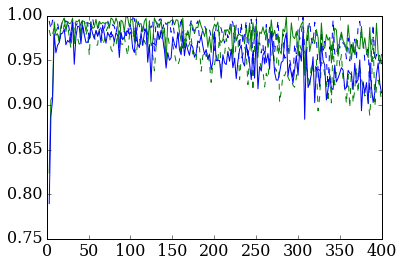

In [25]:
plot(r, q_mw_s_i, ls='--', c='g')
plot(r, s_mw_s_i, ls='--', c='b', label='shells')

plot(r, s_mw_s_f, ls='-', c='g')
plot(r, q_mw_s_f, ls='-', c='b', label='spheres')

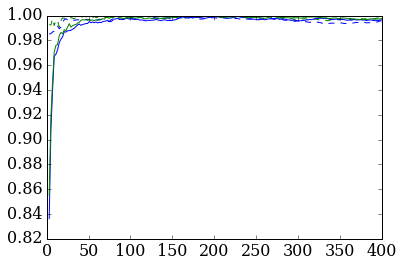

In [26]:
plot(r, q_mw_v_i, ls='--', c='b')
plot(r, s_mw_v_i, ls='--', c='g', label='spheres')

plot(r, q_mw_v_f, ls='-', c='b')
plot(r, s_mw_v_f, ls='-', c='g', label='spheres')